In [2]:
from sklearn import model_selection
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn import preprocessing

In [3]:
df= pd.read_csv("C:\\Users\\Dell\\Downloads\\grocerydata.csv")

In [4]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.iloc[:,5].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [8]:
droplist=['Invoice ID','Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment','cogs','gross margin percentage', 'gross income']

df_new = df.drop(droplist,axis=1)
df_new

,Branch,City,Customer type,Gender,Product line,Unit price,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,5.3
...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,4.1


In [9]:
df_new.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Rating'],
      dtype='object')

In [10]:
df_new.describe()

,Unit price,Rating
count,1000.000000,1000.00000
mean,55.672130,6.97270
std,26.494628,1.71858
min,10.080000,4.00000
25%,32.875000,5.50000
50%,55.230000,7.00000
75%,77.935000,8.50000
max,99.960000,10.00000


In [11]:
df_one = pd.get_dummies(df_new["Branch"])
df_two = pd.get_dummies(df_new["City"])
df_three = pd.get_dummies(df_new["Customer type"])
df_five = pd.get_dummies(df_new["Product line"])


for i in range(len(df_new)):
    if df_new.iloc[i,3]=="Female":
        df_new.iloc[i,3]=1
    else:
        df_new.iloc[i,3]=0
    
    
# print(df_one,
# df_two,
# df_three,
# df_four,
# df_five)

df_new.drop(['Branch', 'City', 'Customer type', 'Product line'],inplace=True, axis=1)
df_ready=pd.concat((df_one, df_two, df_three, df_five, df_new), axis=1)

In [12]:
df_ready.columns[16]

'Rating'

In [13]:
df_ready

,A,B,C,Mandalay,Naypyitaw,Yangon,Member,Normal,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Gender,Unit price,Rating
0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,74.69,9.1
1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,15.28,9.6
2,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,46.33,7.4
3,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,58.22,8.4
4,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,86.31,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,40.35,6.2
996,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,97.38,4.4
997,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,31.84,7.7
998,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,65.82,4.1


In [14]:
#data division for rating prediction (1)

x1=df_ready.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15]]
y1=df_ready.iloc[:,16]


In [15]:
x1.columns

Index(['A', 'B', 'C', 'Mandalay', 'Naypyitaw', 'Yangon', 'Member', 'Normal',
       'Electronic accessories', 'Fashion accessories', 'Food and beverages',
       'Health and beauty', 'Home and lifestyle', 'Sports and travel',
       'Unit price'],
      dtype='object')

In [16]:
min_max_scaler_object = preprocessing.MinMaxScaler()

min_max_scaler_object.fit(x1)
x1_new = min_max_scaler_object.transform(x1)


In [17]:
x1_train, x1_test, y1_train, y1_test= model_selection.train_test_split(x1_new,y1,test_size=0.3,shuffle=False)

In [18]:
alg1=LinearRegression()
alg1.fit(x1_train, y1_train)
y1_pred= alg1.predict(x1_test)
mse = mean_squared_error(y1_test, y1_pred)
score_1=alg1.score(x1_test , y1_test)
print(score_1)
print(np.sqrt(mse))

-0.014282896442360027
1.7415148271631704


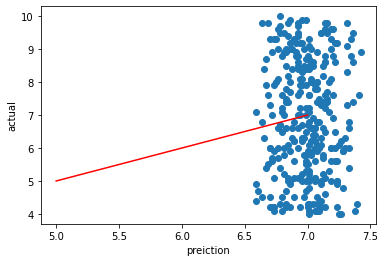

In [19]:
import matplotlib.pyplot as plt
 
plt.scatter(y1_pred, y1_test)
x = np.linspace(5,7)
y = x
plt.plot(x, y,'r' )
plt.xlabel("preiction")
plt.ylabel("actual")
plt.show()

In [20]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=500, max_depth=2, learning_rate=10)


In [23]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(bst, {'max_depth': [2, 4, 6],
                                   'n_estimators': [50, 100, 200]}, verbose=1,
                       n_jobs=2)

In [24]:
clf.fit(x1_train, y1_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\Dell\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1440, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60], got [ 4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3
  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7
  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1
  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5
  9.6  9.7  9.8  9.9 10. ]

In [ ]:
print(clf.best_params_)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1_train = le.fit_transform(y1_train)
y1_test = le.fit_transform(y1_test)


In [ ]:
bst.fit(x1_train, y1_train)
y1_pred_xg= bst.predict(x1_test)
score_1_xg=bst.score(x1_test , y1_test)
print(score_1_xg)

In [25]:
y1_pred_xg

NameError: name 'y1_pred_xg' is not defined

In [26]:
y1_pred_xg = le.inverse_transform(y1_pred_xg)
y1_pred_xg

NameError: name 'le' is not defined

In [ ]:


import matplotlib.pyplot as plt
 
plt.scatter(y1_pred_xg, y1_test)
x = np.linspace(4,10)
y = x
plt.plot(x, y,'r' )
plt.xlabel("preiction")
plt.ylabel("actual")
plt.show()

In [ ]:
from sklearn import svm
clfsvm=svm.SVR(kernel='rbf')

clfsvm.fit(x1_train, y1_train)
y1_pred_svm= clfsvm.predict(x1_test)
score_1_svm=clfsvm.score(x1_test , y1_test)
print(score_1_svm)

In [ ]:
y1_pred+2>10

In [ ]:
import matplotlib.pyplot as plt
 
plt.scatter(y1_pred_svm+2, y1_test)
x = np.linspace(6,8)
y = x
plt.plot(x, y,'r' )
plt.xlabel("preiction")
plt.ylabel("actual")
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV
abc=GridSearchCV(clfsvm, {'C':[1e2,1e3,5e3,1e4,5e4,1e5], 'gamma':[1e-3,5e-4,1e-4,5e-3]})

NameError: name 'clfsvm' is not defined

In [ ]:
abc.fit(x2_train,y2_train)
abc.best_estimator_

In [27]:
#data division for gender prediction (2)

x2=df_ready.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16]]
y2=df_ready.iloc[:,14]


In [29]:
x2.columns

Index(['A', 'B', 'C', 'Mandalay', 'Naypyitaw', 'Yangon', 'Member', 'Normal',
       'Electronic accessories', 'Fashion accessories', 'Food and beverages',
       'Health and beauty', 'Home and lifestyle', 'Sports and travel',
       'Unit price', 'Rating'],
      dtype='object')

In [17]:
min_max_scaler_object = preprocessing.MinMaxScaler()

min_max_scaler_object.fit(x2)
x2_new = min_max_scaler_object.transform(x2)


In [18]:
x2_train, x2_test, y2_train, y2_test= model_selection.train_test_split(x2_new,y2,test_size=0.3,shuffle=False)

In [19]:
y2_train.unique()

array([1, 0], dtype=object)

In [20]:
y2_train=y2_train.astype('int')
y2_test = y2_test.astype('int')

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x2_train,y2_train)
rfc.score(x2_test , y2_test)

0.4533333333333333

In [166]:
from sklearn.neighbors import KNeighborsClassifier

clfknn=KNeighborsClassifier(n_neighbors=4)
clfknn.fit(x2_train,y2_train)
clfknn.score(x2_test , y2_test)

0.49

In [24]:
from sklearn.model_selection import GridSearchCV
abc=GridSearchCV(clfsvc, {'C':[1e2,1e3,5e3,1e4,5e4,1e5], 'gamma':[1e-3,5e-4,1e-4,5e-3]})

In [25]:
abc.fit(x2_train,y2_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]})

In [27]:
abc.best_estimator_

SVC(C=100.0, gamma=0.0001)

In [66]:
from sklearn.svm import SVC

clfsvc= SVC(C=10, gamma=0.1,kernel="rbf")
clfsvc.fit(x2_train,y2_train)
clfsvc.score(x2_test , y2_test)

0.5366666666666666

In [171]:
arr2=np.arange(10)

In [172]:
arr2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [185]:
arr2[3]+arr2[5]

8

In [186]:
a = [-2,1,5,3,8,5,6]
b = [1,2,5]
c = [ a[i] for i in b]
c

[1, 5, 5]